#Prepare dataset

Import Prerequisits 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load the dataset 

In [2]:
df = pd.read_csv(r'/content/Copy of PHISHING_DATASET.csv')
df.head(5)

,URL_IDENTIFICATION,URL_LENGTH,CHARACTER_SET,SPECIAL_CHARACTERS,SERVER,CONTENT_LENGTH,COUNTRY,STATE,REGISTRATION_DATE,UPDATED_DATE,...,PORTS_DETECTED,REMOTE_IP,BYTES_TRANSFERRED,REMOTE_APP_PACKETS,SOURCE_APP_PACKETS,REMOTE_APP_BYTES,SOURCE_APP_BYTES,IP_PACKETS,DNS_PACKETS,WEBSITE_TYPE
0,A0_71,21,ISO-8859-1,7,Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_b...,957.0,United Kingdom,NaN,16 July 2000,04 July 2015,...,0,1,717,10,11,1011,1960,11,4.0,1
1,A0_97,21,iso-8859-1,7,nginx,686.0,Russia,Novosibirskaya obl.,25 May 2013,23 May 2016,...,0,2,603,9,8,745,1580,8,2.0,1
2,M0_2303,21,us-ascii,6,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,09 August 1999,10 February 2015,...,7,3,618,9,7,618,562,7,0.0,0
3,M0_584,21,utf-8,6,nginx,15025.0,NaN,NaN,NaN,NaN,...,1,5,1099,17,15,1243,15476,15,2.0,0
4,M0_2122,22,iso-8859-1,6,nginx,318.0,America,Tennessee,02 November 2003,29 June 2015,...,6,6,696,10,8,696,636,8,0.0,0


check null values if present, replace with 0

In [3]:
df.isnull().sum()

URL_IDENTIFICATION        0
URL_LENGTH                0
CHARACTER_SET             7
SPECIAL_CHARACTERS        0
SERVER                  176
CONTENT_LENGTH          813
COUNTRY                 308
STATE                   365
REGISTRATION_DATE       128
UPDATED_DATE            140
TCP_PACKETS_EXCHANGE      0
PORTS_DETECTED            0
REMOTE_IP                 0
BYTES_TRANSFERRED         0
REMOTE_APP_PACKETS        0
SOURCE_APP_PACKETS        0
REMOTE_APP_BYTES          0
SOURCE_APP_BYTES          0
IP_PACKETS                0
DNS_PACKETS               1
WEBSITE_TYPE              0
dtype: int64

In [4]:
df=df.fillna(0)

 Parse the date columns to datetime format, handling null values

In [5]:

df["REGISTRATION_DATE"] = pd.to_datetime(df["REGISTRATION_DATE"], format="%d %B %Y", errors="coerce")
df["UPDATED_DATE"] = pd.to_datetime(df["UPDATED_DATE"], format="%d %B %Y", errors="coerce")

In [17]:
df.dtypes

URL_IDENTIFICATION        int64
URL_LENGTH                int64
CHARACTER_SET             int64
SPECIAL_CHARACTERS        int64
SERVER                    int64
CONTENT_LENGTH          float64
COUNTRY                   int64
STATE                     int64
REGISTRATION_DATE        object
UPDATED_DATE             object
TCP_PACKETS_EXCHANGE      int64
PORTS_DETECTED            int64
REMOTE_IP                 int64
BYTES_TRANSFERRED         int64
REMOTE_APP_PACKETS        int64
SOURCE_APP_PACKETS        int64
REMOTE_APP_BYTES          int64
SOURCE_APP_BYTES          int64
IP_PACKETS                int64
DNS_PACKETS             float64
WEBSITE_TYPE              int64
dtype: object

Again check For Null

In [6]:
df.isnull().sum()

URL_IDENTIFICATION        0
URL_LENGTH                0
CHARACTER_SET             0
SPECIAL_CHARACTERS        0
SERVER                    0
CONTENT_LENGTH            0
COUNTRY                   0
STATE                     0
REGISTRATION_DATE       136
UPDATED_DATE            145
TCP_PACKETS_EXCHANGE      0
PORTS_DETECTED            0
REMOTE_IP                 0
BYTES_TRANSFERRED         0
REMOTE_APP_PACKETS        0
SOURCE_APP_PACKETS        0
REMOTE_APP_BYTES          0
SOURCE_APP_BYTES          0
IP_PACKETS                0
DNS_PACKETS               0
WEBSITE_TYPE              0
dtype: int64

In [10]:
df=df.fillna(0)

Convert all columns with string values to string format

In [7]:
df["URL_IDENTIFICATION"] = df["URL_IDENTIFICATION"].astype(str)
df["CHARACTER_SET"] = df["CHARACTER_SET"].astype(str)
df["SERVER"] = df["SERVER"].astype(str)
df["COUNTRY"] = df["COUNTRY"].astype(str)
df["STATE"] = df["STATE"].astype(str)

In [8]:
from sklearn.preprocessing import LabelEncoder

In [11]:
encoder = LabelEncoder()

Perform label encoding to convert values to numerical format

In [12]:
df["URL_IDENTIFICATION"] = encoder.fit_transform(df["URL_IDENTIFICATION"])
df["CHARACTER_SET"] = encoder.fit_transform(df["CHARACTER_SET"])
df["SERVER"] = encoder.fit_transform(df["SERVER"])
df["COUNTRY"] = encoder.fit_transform(df["COUNTRY"])
df["STATE"] = encoder.fit_transform(df["STATE"])

#Dimension reduction

Plot Correlation Matrix to check feature dependencies and to remove un-necessory features 

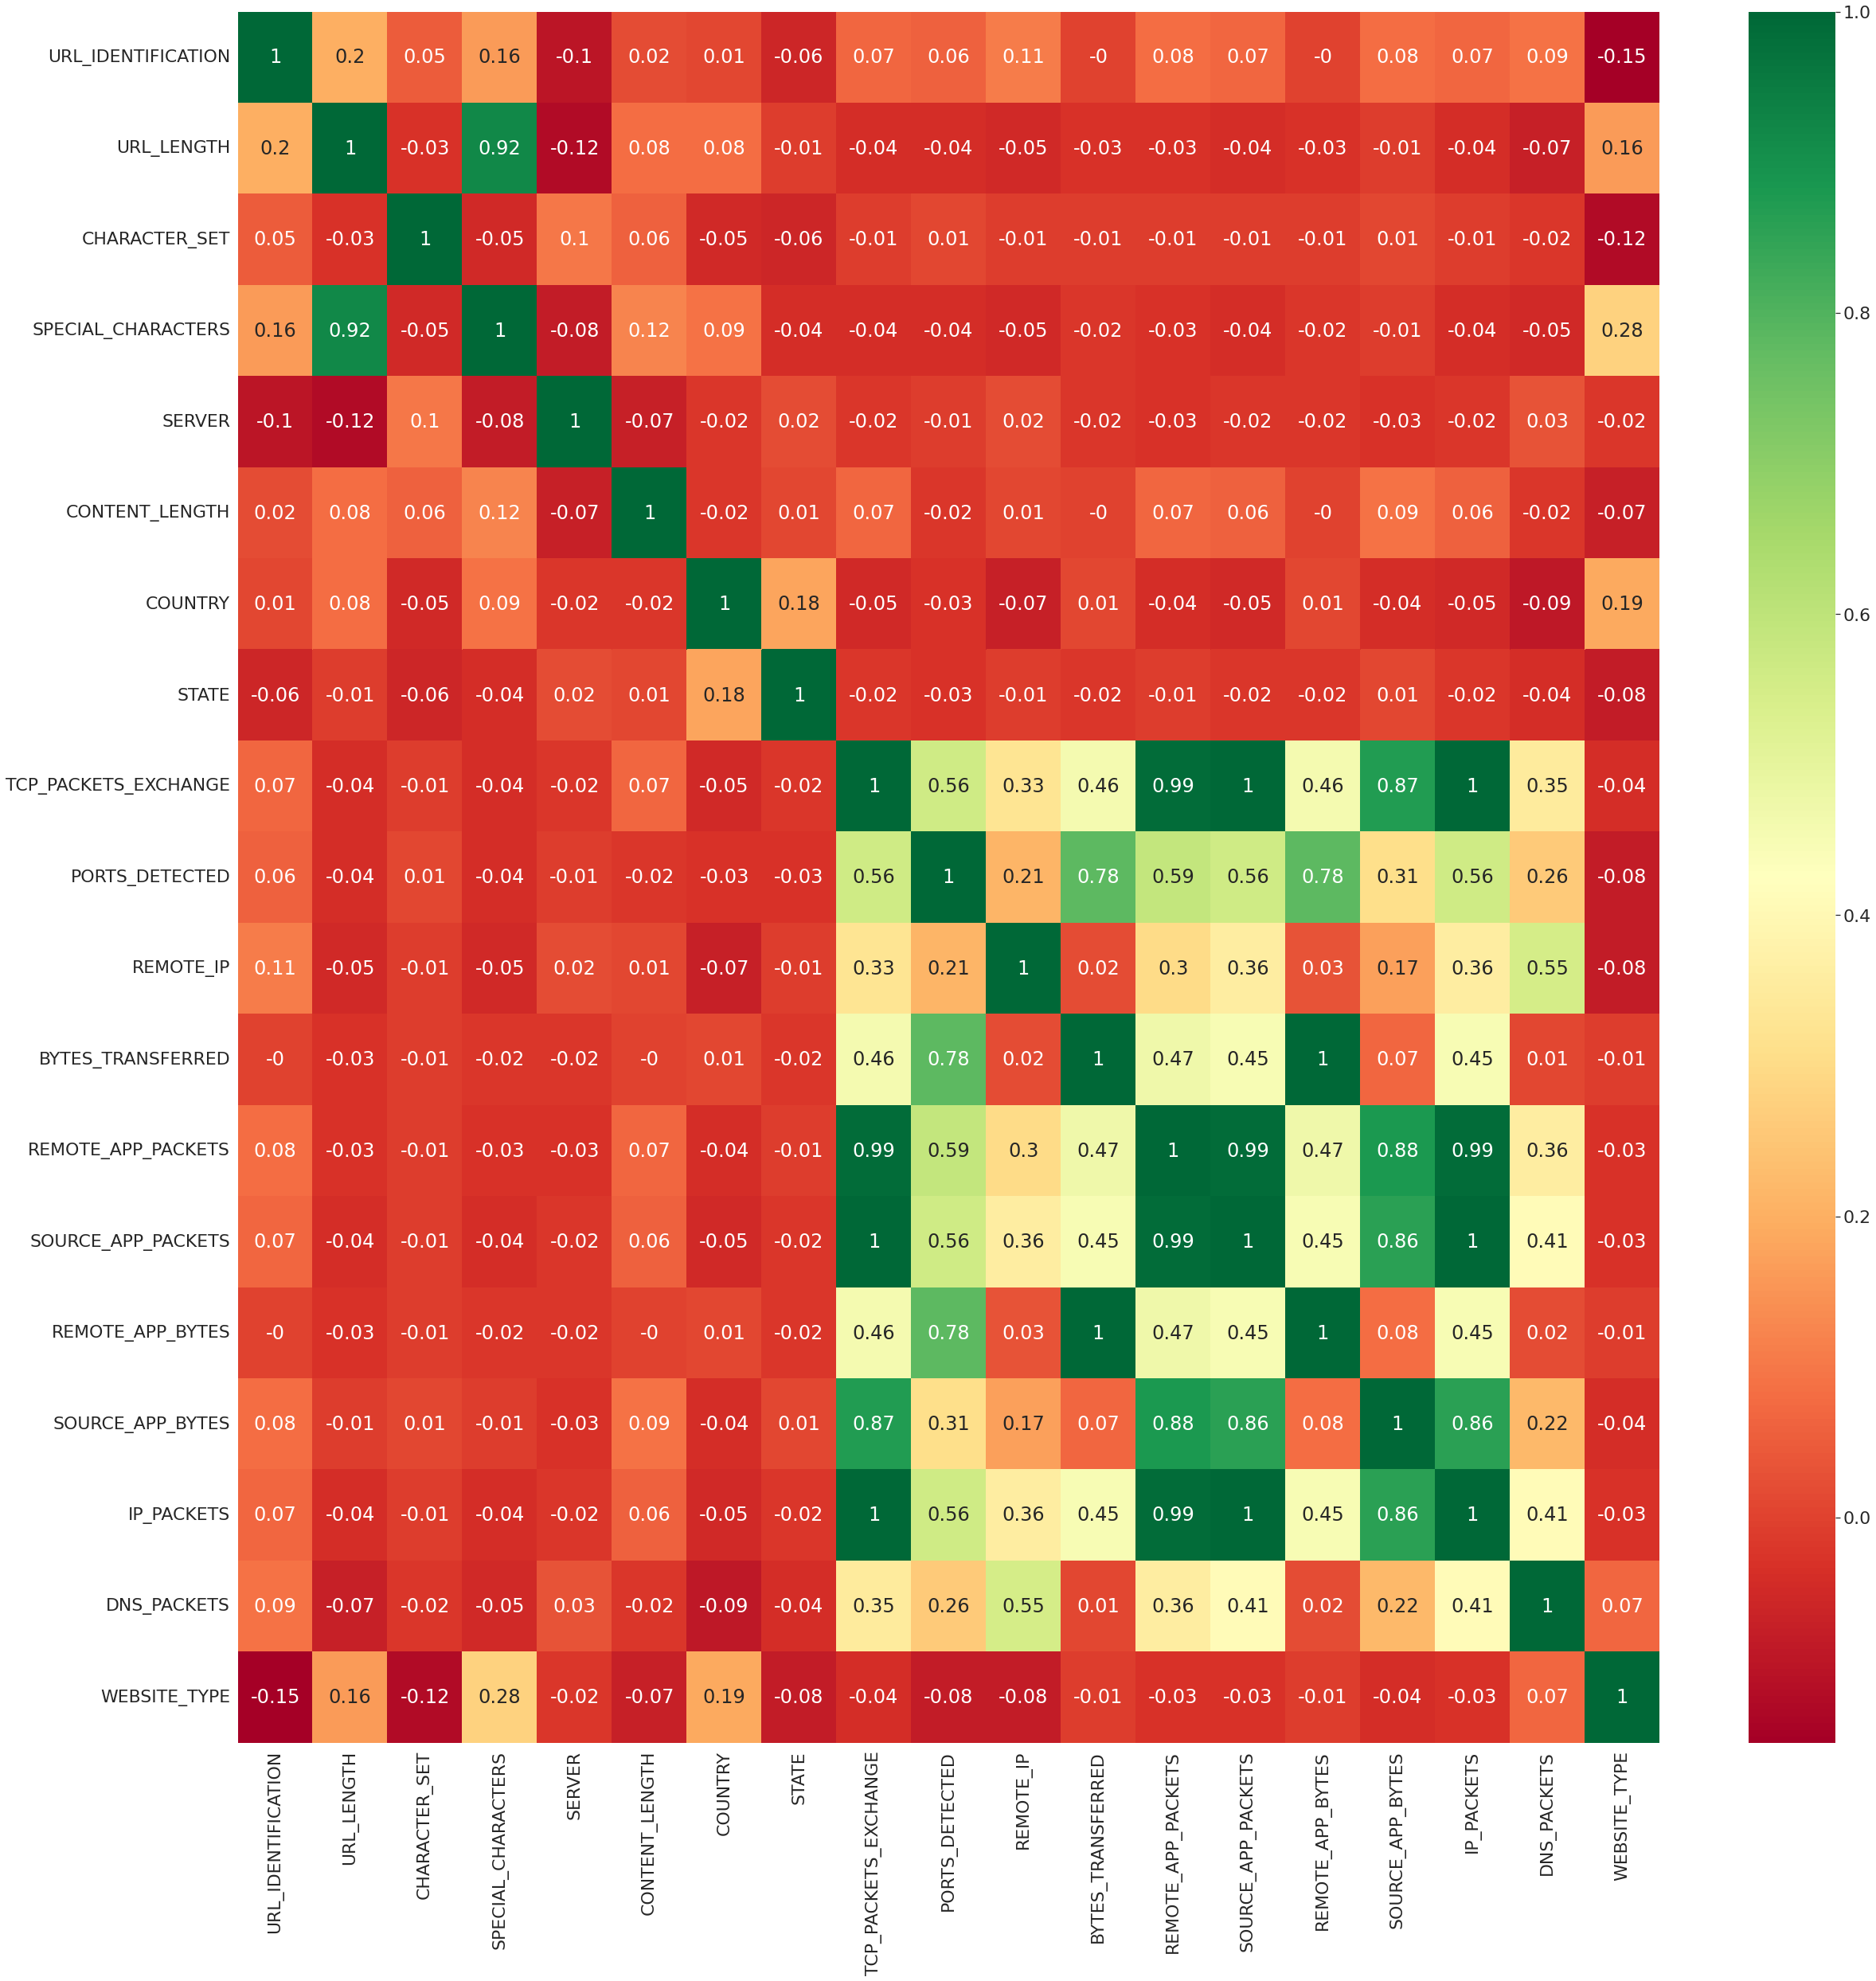

In [56]:
corr = df.corr()
plt.figure(figsize=(40,40))
sns.set(font_scale=2)
sns.heatmap(df.corr().round(2), cmap='RdYlGn', annot=True)
plt.show()

In [21]:
df.drop(columns=['REGISTRATION_DATE','UPDATED_DATE'],inplace=True)

#Use Algorithms 

In [23]:
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

Extract the features and labels

In [22]:

X = df.drop("WEBSITE_TYPE", axis=1)
y = df["WEBSITE_TYPE"]

Split into train test set

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


Use Kfold to distribute into multiple splits 

In [25]:
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=2022)

count O's and 1's in dataset


In [28]:
from collections import Counter

# Count the number of 0s and 1s in y
counts = Counter(y)

# Print the counts
print("Number of 0s:", counts[0])
print("Number of 1s:", counts[1])

Number of 0s: 1569
Number of 1s: 217


Since the number of 0 and 1 have much more difference we have to use SMOTE  (Synthetic Minority Oversampling Technique)

In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
smo = SMOTE(random_state=100)
x_resampled, y_resampled = smo.fit_resample(X_train, y_train)
print(np.unique(y_resampled,return_counts=True))
x_resampled.shape
X_train.shape

(array([0, 1]), array([1100, 1100]))


(1250, 18)

#Random Forest 

In [31]:
clf = RandomForestClassifier()

Set params and fit 

In [54]:
params = {'max_features':[2,3,4],
          'n_estimators':[10,20,50,90]}
gcv_cl = GridSearchCV(clf, param_grid=params,scoring='roc_auc',cv=kfold)
gcv_cl.fit(x_resampled, y_resampled)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 3, 4],
                         'n_estimators': [10, 20, 50, 90]},
             scoring='roc_auc')

In [33]:
print(gcv_cl.best_params_)
print(gcv_cl.best_score_)

{'max_features': 3, 'n_estimators': 90}
0.9999008264462809


Evaluate the model on the testing set

In [34]:
best_model_cl=gcv_cl.best_estimator_
y_pred_clf = best_model_cl.predict(X_test)

In [35]:
print(classification_report(y_test, y_pred_clf))
print(roc_auc_score(y_test, y_pred_clf))
print(accuracy_score(y_test, y_pred_clf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       469
           1       0.99      0.99      0.99        67

    accuracy                           1.00       536
   macro avg       0.99      0.99      0.99       536
weighted avg       1.00      1.00      1.00       536

0.9914712153518123
0.996268656716418


#K-NN

In [37]:
knn=KNeighborsClassifier()

set params and fit 

In [38]:
params = {'n_neighbors':[2,3,4]}
gcv_kn = GridSearchCV(knn, param_grid=params,scoring='roc_auc',cv=kfold)
gcv_kn.fit(x_resampled, y_resampled)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4]}, scoring='roc_auc')

In [39]:
print(gcv_kn.best_params_)
print(gcv_kn.best_score_)

{'n_neighbors': 4}
0.9891756198347108


Evaluate the model on the testing set

In [40]:
best_model_kn=gcv_kn.best_estimator_
y_pred_knn = best_model_kn.predict(X_test)

In [41]:
print(classification_report(y_test, y_pred_knn))
print(roc_auc_score(y_test, y_pred_knn))
print(accuracy_score(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       469
           1       0.86      0.85      0.86        67

    accuracy                           0.96       536
   macro avg       0.92      0.92      0.92       536
weighted avg       0.96      0.96      0.96       536

0.915778251599147
0.9645522388059702


#Logistic Regression

In [42]:
lr = LogisticRegression(random_state=2022)

Set params and fit 

In [49]:
params = {'max_iter':[100,200,300],
          'solver':['liblinear']}
gcv_lr = GridSearchCV(lr, param_grid=params,scoring='roc_auc',cv=kfold)
gcv_lr.fit(x_resampled, y_resampled)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=LogisticRegression(random_state=2022),
             param_grid={'max_iter': [100, 200, 300], 'solver': ['liblinear']},
             scoring='roc_auc')

In [50]:
print(gcv_lr.best_params_)
print(gcv_lr.best_score_)

{'max_iter': 100, 'solver': 'liblinear'}
0.9514132231404957


Evaluate the model on the testing set

In [51]:
best_model_lr=gcv_lr.best_estimator_
y_pred_lr = best_model_lr.predict(X_test)

In [52]:
print(classification_report(y_test, y_pred_lr))
print(roc_auc_score(y_test, y_pred_lr))
print(accuracy_score(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       469
           1       0.45      0.75      0.56        67

    accuracy                           0.86       536
   macro avg       0.71      0.81      0.74       536
weighted avg       0.90      0.86      0.87       536

0.8091684434968016
0.8563432835820896


# Conclusion

Now from above results, if we can offord more phishing websites to be declared as non-phishing we have to go with Logistic Regression, but if we have to choose more non-phishing websites that can be said as phishing websites then we have to go with  K-NN

For results of Logistic Regression call **'y_pred_lr'**

For results of K-NN call  **'y_pred_knn'**